In [2]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Read csv files for each year and store in relevant dataframe:
#yearlist=["2012","2013","2014","2015","2016"]
#for year in yearlist:
#    fname="ObesityEduIncome_" + year + ".csv"
#    print(fname)
edui2012_df = pd.read_csv("ObesityEduIncome_2012.csv")
edui2013_df = pd.read_csv("ObesityEduIncome_2013.csv")
edui2014_df = pd.read_csv("ObesityEduIncome_2014.csv")
edui2015_df = pd.read_csv("ObesityEduIncome_2015.csv")
edui2016_df = pd.read_csv("ObesityEduIncome_2016.csv")
    

In [4]:
edui2016_df.head(5)

,State,Date,BMI Category,BMI Over 25,Education_Level,INCOME2
0,AL,1072016,Normal Weight,No,Graduated High School,"$25,000 to less than $35,000"
1,AL,1112016,Overweight,Yes,Graduated High School,"$50,000 to less than $75,000"
2,AL,1062016,Normal Weight,No,Attended College or Technical School,"$50,000 to less than $75,000"
3,AL,1082016,Overweight,Yes,Graduated from College or Technical School,"$50,000 to less than $75,000"
4,AL,1052016,Normal Weight,No,Graduated High School,Don’t know/Not sure


In [5]:
#Review unqiue values for BMI category
edui2016_df["BMI Category"].unique()

array(['Normal Weight', 'Overweight', "Don't know/Refused/Missing",
       'Obese', 'Underweight'], dtype=object)

In [6]:
edui2016_df["Education_Level"].unique()

array(['Graduated High School', 'Attended College or Technical School',
       'Graduated from College or Technical School',
       'Did not graduate High School', 'Don’t know/Not sure/Missing'],
      dtype=object)

In [7]:
cnt=0
for row,col in edui2016_df.iterrows():
    print(col)
    cnt=cnt+1
    if cnt > 2:
        break

State                                        AL
Date                                    1072016
BMI Category                      Normal Weight
BMI Over 25                                  No
Education_Level           Graduated High School
INCOME2            $25,000 to less than $35,000
Name: 0, dtype: object
State                                        AL
Date                                    1112016
BMI Category                         Overweight
BMI Over 25                                 Yes
Education_Level           Graduated High School
INCOME2            $50,000 to less than $75,000
Name: 1, dtype: object
State                                                AL
Date                                            1062016
BMI Category                              Normal Weight
BMI Over 25                                          No
Education_Level    Attended College or Technical School
INCOME2                    $50,000 to less than $75,000
Name: 2, dtype: object


In [5]:
#separate values for BMI category into just overweight, obese and other. 
edui2016_df["BMI Category"] = edui2016_df["BMI Category"].replace(
    {"Normal Weight": "Other", "Don't know/Refused/Missing": "Other","Underweight":"Other"})


In [6]:
edui2016_df["BMI Category"].unique()

array(['Other', 'Overweight', 'Obese'], dtype=object)

In [8]:
#group by education level and bmi category to get counts in each category.
edui2016_grp = edui2016_df.groupby(["Education_Level","BMI Category"])["State"].count()

In [9]:
edui2016_grp.head(5)

Education_Level                       BMI Category
Attended College or Technical School  Obese           39987
                                      Other           49065
                                      Overweight      43616
Did not graduate High School          Obese           12125
                                      Other           14086
Name: State, dtype: int64

In [10]:
#unstack to get each count as a column in the dataframe.
edui2016_grp_cnt = edui2016_grp.unstack(level=1)

In [11]:
edui2016_grp_cnt

BMI Category,Obese,Other,Overweight
Education_Level,,,
Attended College or Technical School,39987,49065,43616
Did not graduate High School,12125,14086,11478
Don’t know/Not sure/Missing,220,1215,314
Graduated High School,42256,49546,43941
Graduated from College or Technical School,40230,73599,60773


In [12]:
#Determine total counts for all categories.
edui2016_grp_cnt["Total_cnt"] = edui2016_grp_cnt["Obese"] + edui2016_grp_cnt["Overweight"] + edui2016_grp_cnt["Other"] 

In [13]:
#Determine percent obese for each education level
edui2016_grp_cnt["percent_obese"] = (edui2016_grp_cnt["Obese"] / edui2016_grp_cnt["Total_cnt"]) * 100

In [14]:
#Determine percent overweight for each education level
edui2016_grp_cnt["percent_overweight"] = (edui2016_grp_cnt["Overweight"] / edui2016_grp_cnt["Total_cnt"]) * 100

In [30]:
#make Education a column in the dataframe.
edui2016_grp_cnt["Education_level"]= edui2016_grp_cnt.index

In [31]:
edui2016_grp_cnt.columns

Index(['Obese', 'Other', 'Overweight', 'Total_cnt', 'percent_obese',
       'percent_overweight', 'Education_level'],
      dtype='object', name='BMI Category')

In [35]:
edui2016_grp_cnt["Education_level"]

Education_Level
Attended College or Technical School                Attended College or Technical School
Did not graduate High School                                Did not graduate High School
Don’t know/Not sure/Missing                                  Don’t know/Not sure/Missing
Graduated High School                                              Graduated High School
Graduated from College or Technical School    Graduated from College or Technical School
Name: Education_level, dtype: object

In [7]:
#Create another column with education short form for ease of plotting.
edui2016_grp_cnt["Education_short"] = edui2016_grp_cnt["Education_level"]

NameError: name 'edui2016_grp_cnt' is not defined

In [41]:
edui2016_grp_cnt

BMI Category,Obese,Other,Overweight,Total_cnt,percent_obese,percent_overweight,Education_level,Education_short
Education_Level,,,,,,,,
Attended College or Technical School,39987,49065,43616,132668,30.140652,32.876051,Attended College or Technical School,Attended College or Technical School
Did not graduate High School,12125,14086,11478,37689,32.171191,30.454509,Did not graduate High School,Did not graduate High School
Don’t know/Not sure/Missing,220,1215,314,1749,12.578616,17.953116,Don’t know/Not sure/Missing,Don’t know/Not sure/Missing
Graduated High School,42256,49546,43941,135743,31.129414,32.370730,Graduated High School,Graduated High School
Graduated from College or Technical School,40230,73599,60773,174602,23.040973,34.806589,Graduated from College or Technical School,Graduated from College or Technical School


In [42]:
#Replace education level with short form values. 
edui2016_grp_cnt["Education_short"] = edui2016_grp_cnt["Education_short"].replace(
    {"Attended College or Technical School": "ST College", "Did not graduate High School":"No-pass HS",
     "Don’t know/Not sure/Missing":"Unknown","Graduated High School":"Grad HS",
     "Graduated from College or Technical School":"Grad College"
    })

In [43]:
edui2016_grp_cnt

BMI Category,Obese,Other,Overweight,Total_cnt,percent_obese,percent_overweight,Education_level,Education_short
Education_Level,,,,,,,,
Attended College or Technical School,39987,49065,43616,132668,30.140652,32.876051,Attended College or Technical School,ST College
Did not graduate High School,12125,14086,11478,37689,32.171191,30.454509,Did not graduate High School,No-pass HS
Don’t know/Not sure/Missing,220,1215,314,1749,12.578616,17.953116,Don’t know/Not sure/Missing,Unknown
Graduated High School,42256,49546,43941,135743,31.129414,32.370730,Graduated High School,Grad HS
Graduated from College or Technical School,40230,73599,60773,174602,23.040973,34.806589,Graduated from College or Technical School,Grad College


In [29]:
#Fields in the dataframe.
edui2016_df.head(3)

,State,Date,BMI Category,BMI Over 25,Education_Level,INCOME2
0,AL,1072016,Normal Weight,No,Graduated High School,"$25,000 to less than $35,000"
1,AL,1112016,Overweight,Yes,Graduated High School,"$50,000 to less than $75,000"
2,AL,1062016,Normal Weight,No,Attended College or Technical School,"$50,000 to less than $75,000"


In [16]:
#group by education level and income to get counts in each category.
edui2016_incdf = edui2016_df.rename(columns={"INCOME2":"Income_range"})
edui2016_incdf.head(3)


,State,Date,BMI Category,BMI Over 25,Education_Level,Income_range
0,AL,1072016,Other,No,Graduated High School,"$25,000 to less than $35,000"
1,AL,1112016,Overweight,Yes,Graduated High School,"$50,000 to less than $75,000"
2,AL,1062016,Other,No,Attended College or Technical School,"$50,000 to less than $75,000"


In [17]:
edui2016_incdf["Income_range"].unique()

array(['$25,000 to less than $35,000', '$50,000 to less than $75,000',
       'Don’t know/Not sure', 'Refused', '$75,000 or more',
       '$35,000 to less than $50,000', 'Less than $10,000',
       '$20,000 to less than $25,000', '$15,000 to less than $20,000',
       '$10,000 to less than $15,000', 'Not asked or Missing'], dtype=object)

In [18]:
#separate values for BMI category into just overweight, obese and other. 
edui2016_incdf["BMI Category"] = edui2016_incdf["BMI Category"].replace(
    {"Normal Weight": "Other", "Don't know/Refused/Missing": "Other","Underweight":"Other"})

#Replace certain missing or other categories into Other category.
edui2016_incdf["Income_range"] = edui2016_incdf["Income_range"].replace(
    {"Don’t know/Not sure": "Other", "Not asked or Missing": "Other","Refused":"Other"})

#Create another column with education short form for ease of plotting.
edui2016_incdf["Education_short"] = edui2016_incdf["Education_Level"]
#Replace Education short form values. 
edui2016_incdf["Education_short"] = edui2016_incdf["Education_short"].replace(
    {"Attended College or Technical School": "ST College", "Did not graduate High School":"No-pass HS",
     "Don’t know/Not sure/Missing":"Unknown","Graduated High School":"Grad HS",
     "Graduated from College or Technical School":"Grad College"
    })

#Create another column with imcome short form.
edui2016_incdf["Income_short"] = edui2016_incdf["Income_range"]
#edui2016_incdf["Income_short"] = edui2016_incdf["Income_short"].replace(
#    {"Less than $10,000": "< 15K", "$10,000 to less than $15,000":"< 15K",
#     "$15,000 to less than $20,000":"15 to 20K","$20,000 to less than $25,000":"20 to 25Kn",
#     "$25,000 to less than $35,000":"25 to 35 K","$35,000 to less than $50,000":"35 to 50 K",
#     "$50,000 to less than $75,000":"50 to 75 K"      
        
#     
#    })


In [19]:
edui2016_incdf.head(5)

,State,Date,BMI Category,BMI Over 25,Education_Level,Income_range,Education_short,Income_short
0,AL,1072016,Other,No,Graduated High School,"$25,000 to less than $35,000",Grad HS,"$25,000 to less than $35,000"
1,AL,1112016,Overweight,Yes,Graduated High School,"$50,000 to less than $75,000",Grad HS,"$50,000 to less than $75,000"
2,AL,1062016,Other,No,Attended College or Technical School,"$50,000 to less than $75,000",ST College,"$50,000 to less than $75,000"
3,AL,1082016,Overweight,Yes,Graduated from College or Technical School,"$50,000 to less than $75,000",Grad College,"$50,000 to less than $75,000"
4,AL,1052016,Other,No,Graduated High School,Other,Grad HS,Other


In [20]:
#Group data frame by education, income range and bmi category to determine counts and % obese. 
edui2016_inc_grp = edui2016_incdf.groupby(["Education_short","Income_range","BMI Category"])["Date"].count()

In [21]:
edui2016_inc_grp.head(5)

Education_short  Income_range                  BMI Category
Grad College     $10,000 to less than $15,000  Obese            794
                                               Other           1043
                                               Overweight       740
                 $15,000 to less than $20,000  Obese           1197
                                               Other           1689
Name: Date, dtype: int64

In [42]:
edui2016_inc_grp1.head(5)

BMI Category,Education_short,Income_range,Obese,Other,Overweight,Total_cnt,percent_obese,percent_overweight
0,Grad College,"$10,000 to less than $15,000",794,1043,740,2577,30.811021,28.715561
1,Grad College,"$15,000 to less than $20,000",1197,1689,1227,4113,29.102845,29.832239
2,Grad College,"$20,000 to less than $25,000",1767,2616,1978,6361,27.778651,31.095740
3,Grad College,"$25,000 to less than $35,000",2608,3904,3352,9864,26.439578,33.982157
4,Grad College,"$35,000 to less than $50,000",5058,7299,6251,18608,27.181857,33.593078


In [22]:

#unstack to get each count as a column in the dataframe.
edui2016_inc_grp1 = edui2016_inc_grp.unstack(level=2)

In [23]:
#edui2016_inc_grp1
#Determine total counts for all categories.
edui2016_inc_grp1["Total_cnt"] = edui2016_inc_grp1["Obese"] + edui2016_inc_grp1["Overweight"] + edui2016_inc_grp1["Other"] 

#Determine percent obese for each education level
edui2016_inc_grp1["percent_obese"] = (edui2016_inc_grp1["Obese"] / edui2016_inc_grp1["Total_cnt"]) * 100

#Determine percent overweight for each education level
edui2016_inc_grp1["percent_overweight"] = (edui2016_inc_grp1["Overweight"] / edui2016_inc_grp1["Total_cnt"]) * 100


In [24]:
#make Education a column in the dataframe.
#del edui2016_inc_grp1["Education_short"]
##df.reset_index(level='class')#type(edui2016_inc_grp1["percent_obese"])
edui2016_inc_grp1.reset_index(level=None, drop=False, inplace=True)


In [25]:
edui2016_inc_grp1

BMI Category,Education_short,Income_range,Obese,Other,Overweight,Total_cnt,percent_obese,percent_overweight
0,Grad College,"$10,000 to less than $15,000",794,1043,740,2577,30.811021,28.715561
1,Grad College,"$15,000 to less than $20,000",1197,1689,1227,4113,29.102845,29.832239
2,Grad College,"$20,000 to less than $25,000",1767,2616,1978,6361,27.778651,31.095740
3,Grad College,"$25,000 to less than $35,000",2608,3904,3352,9864,26.439578,33.982157
4,Grad College,"$35,000 to less than $50,000",5058,7299,6251,18608,27.181857,33.593078
5,Grad College,"$50,000 to less than $75,000",7278,10787,10172,28237,25.774693,36.023657
6,Grad College,"$75,000 or more",17516,31917,30158,79591,22.007513,37.891219
7,Grad College,"Less than $10,000",623,1048,572,2243,27.775301,25.501560
8,Grad College,Other,3389,13296,6323,23008,14.729659,27.481745
9,Grad HS,"$10,000 to less than $15,000",3092,3083,2464,8639,35.791180,28.521820


In [26]:
edui2016_inc_grp1

BMI Category,Education_short,Income_range,Obese,Other,Overweight,Total_cnt,percent_obese,percent_overweight
0,Grad College,"$10,000 to less than $15,000",794,1043,740,2577,30.811021,28.715561
1,Grad College,"$15,000 to less than $20,000",1197,1689,1227,4113,29.102845,29.832239
2,Grad College,"$20,000 to less than $25,000",1767,2616,1978,6361,27.778651,31.095740
3,Grad College,"$25,000 to less than $35,000",2608,3904,3352,9864,26.439578,33.982157
4,Grad College,"$35,000 to less than $50,000",5058,7299,6251,18608,27.181857,33.593078
5,Grad College,"$50,000 to less than $75,000",7278,10787,10172,28237,25.774693,36.023657
6,Grad College,"$75,000 or more",17516,31917,30158,79591,22.007513,37.891219
7,Grad College,"Less than $10,000",623,1048,572,2243,27.775301,25.501560
8,Grad College,Other,3389,13296,6323,23008,14.729659,27.481745
9,Grad HS,"$10,000 to less than $15,000",3092,3083,2464,8639,35.791180,28.521820


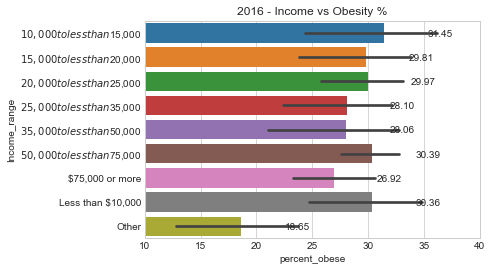

In [40]:
import seaborn as sns
sns.set_style("whitegrid")
#Create plot of income vs obesity %
ax = sns.barplot(y=edui2016_inc_grp1["Income_range"], x=edui2016_inc_grp1["percent_obese"], 
                 data=edui2016_inc_grp1,errwidth=None)
plt.title("2016 - Income vs Obesity %")
for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

plt.xlim(10,40)
plt.show()

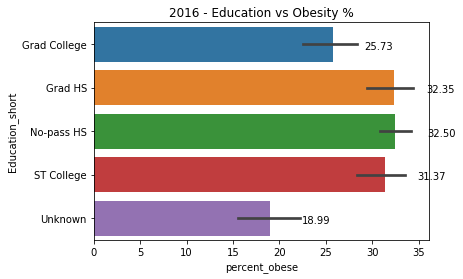

In [37]:
import seaborn as sns
#sns.set_style("whitegrid")
ax = sns.barplot(x=edui2016_inc_grp1["percent_obese"],y=edui2016_inc_grp1["Education_short"], data=edui2016_inc_grp1)
##bar2012 = sns.barplot(x=yes, y=myColumns)
plt.title("2016 - Education vs Obesity %")
for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
plt.show()

In [51]:
edui2016_inc_grp2 = edui2016_inc_grp1.unstack(level=1)

In [60]:
#edui2016_inc_grp2

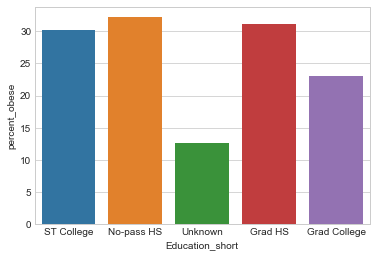

In [44]:
#Create  plots of education vs obesity percent
sns.set_style("whitegrid")
ax = sns.barplot(x=edui2016_grp_cnt["Education_short"], y=edui2016_grp_cnt["percent_obese"], data=edui2016_grp_cnt)

In [ ]:
#Create  plots of education vs overwieght percent

In [ ]:
ax = sns.barplot(x=edui2016_grp_cnt["Education_level"], y=edui2016_grp_cnt["percent_obese"], data=edui2016_grp_cnt)